In [1]:
#Defendencies
import pandas as pd
from pathlib import Path
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import hvplot.pandas
import requests


# Import API key
from api_keys import geoapify_key


import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="holoviews")

In [2]:
#Use Panda to read Data
crash_data = pd.read_csv("Resources/Crash_Data.csv")
crash_data.head()

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.95221,33.42191,1,2598369,2012/01/01 07:25:00+00,2012,University Dr,Hardy Dr,0.000,Intersection Non Interchange,...,Driver,20.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.42191,-111.95221
1,-111.93769,33.42319,2,2593420,2012/01/01 11:45:00+00,2012,7th St,Myrtle Ave,139.920,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.42319,-111.93769
2,-111.89196,33.41842,3,2588493,2012/01/01 18:07:00+00,2012,Price Rd,Orange St,0.000,Intersection Interchange,...,Driver,31.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.41842,-111.89196
3,-111.94791,33.41779,4,2584449,2012/01/02 00:03:00+00,2012,11th St,Judd St,200.112,Not Junction Related,...,Driverless,NaN,NaN,East,Properly Parked,NaN,NaN,NaN,33.41779,-111.94791
4,-111.92847,33.34956,5,2592211,2012/01/02 00:12:00+00,2012,Rural Rd,Elliot Rd,135.168,Intersection Related Non Interchange,...,Driver,20.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.34956,-111.92847


In [3]:
crash_data.shape

(48882, 35)

In [4]:
crash_data.isna().sum()

X                       139
Y                       139
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName               19
CrossStreet             304
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 45
Gender_Drv1             885
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          45
AlcoholUse_Drv1          45
DrugUse_Drv1             45
Unittype_Two           3203
Age_Drv2               4507
Gender_Drv2            4604
Traveldirection_Two    3203
Unitaction_Two         3203
Violation1_Drv2        4507
AlcoholUse_Drv2        4507
DrugUse_Drv2           4507
Latitude                139
Longitude               139
dtype: int64

In [5]:
#filter Data to specific years
specific_year=crash_data.loc[(crash_data["Year"]==2020) | (crash_data["Year"]==2021)
                            | (crash_data["Year"]==2022)]
specific_year

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
37637,-111.942400,33.422150,37638,3614716,2020/01/01 09:02:00+00,2020,Ash Ave,University Dr,80.0,Intersection Related 206,...,Driver,28.0,Male,South,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.422150,-111.942400
37638,-111.955590,33.407410,37639,3614159,2020/01/01 09:11:00+00,2020,Broadway Rd,Industrial Park Ave,-96.0,Not Junction Related,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.407410,-111.955590
37639,-111.945770,33.424320,37640,3608918,2020/01/01 09:41:00+00,2020,Wilson St,6th St,0.0,Intersection 4 Way 202,...,Driver,61.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.424320,-111.945770
37640,-111.922400,33.414770,37641,3614004,2020/01/01 11:04:00+00,2020,Apache Blvd,Terrace Rd,-600.0,Not Junction Related,...,Driver,42.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.414770,-111.922400
37641,-111.926260,33.434030,37642,3614179,2020/01/01 21:37:00+00,2020,Scottsdale Rd,Playa Del Norte Dr,0.0,Intersection T Inter 203,...,Driver,52.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.434030,-111.926260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46462,-111.933653,33.421967,46463,4016095,2022/12/31 20:35:00+00,2022,University Dr,College Ave,401.0,Not Junction Related,...,Driver,22.0,Female,West,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421967,-111.933653
46463,-111.939610,33.393137,46464,4017552,2022/12/31 21:55:00+00,2022,Mill Ave,Southern Ave,100.0,Driveway Or Alley,...,Driver,46.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610
46464,-111.961130,33.378244,46465,4014475,2023/01/01 01:02:00+00,2022,Baseline Rd,Darrow Dr,0.0,Intersection 4 Way 202,...,Driver,19.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378244,-111.961130
46465,-111.965455,33.378270,46466,4014901,2023/01/01 01:45:00+00,2022,Arizona Mills S,Baseline Rd,0.0,Intersection 4 Way 202,...,Driver,21.0,Male,South,Making Right Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.378270,-111.965455


In [6]:
specific_year.count()

X                      8829
Y                      8829
OBJECTID               8830
Incidentid             8830
DateTime               8830
Year                   8830
StreetName             8830
CrossStreet            8665
Distance               8829
JunctionRelation       8829
Totalinjuries          8829
Totalfatalities        8829
Injuryseverity         8829
Collisionmanner        8829
Lightcondition         8829
Weather                8829
SurfaceCondition       8829
Unittype_One           8829
Age_Drv1               8820
Gender_Drv1            8614
Traveldirection_One    8829
Unitaction_One         8829
Violation1_Drv1        8820
AlcoholUse_Drv1        8820
DrugUse_Drv1           8820
Unittype_Two           8042
Age_Drv2               7724
Gender_Drv2            7705
Traveldirection_Two    8042
Unitaction_Two         8042
Violation1_Drv2        7724
AlcoholUse_Drv2        7724
DrugUse_Drv2           7724
Latitude               8829
Longitude              8829
dtype: int64

In [7]:
#drop null rows
Filter_data=specific_year.dropna(how='any')

In [8]:
Filter_data.count()

X                      7400
Y                      7400
OBJECTID               7400
Incidentid             7400
DateTime               7400
Year                   7400
StreetName             7400
CrossStreet            7400
Distance               7400
JunctionRelation       7400
Totalinjuries          7400
Totalfatalities        7400
Injuryseverity         7400
Collisionmanner        7400
Lightcondition         7400
Weather                7400
SurfaceCondition       7400
Unittype_One           7400
Age_Drv1               7400
Gender_Drv1            7400
Traveldirection_One    7400
Unitaction_One         7400
Violation1_Drv1        7400
AlcoholUse_Drv1        7400
DrugUse_Drv1           7400
Unittype_Two           7400
Age_Drv2               7400
Gender_Drv2            7400
Traveldirection_Two    7400
Unitaction_Two         7400
Violation1_Drv2        7400
AlcoholUse_Drv2        7400
DrugUse_Drv2           7400
Latitude               7400
Longitude              7400
dtype: int64

In [9]:
Filter_data["Unittype_Two"].unique()

array(['Driver', 'Pedestrian', 'Pedalcyclist'], dtype=object)

In [10]:
#The people who use Automobile
group_data= Filter_data.groupby(["Unittype_Two"]).count()
filtered_data_df=group_data[["Incidentid"]]
filtered_data_df

,Incidentid
Unittype_Two,
Driver,7179
Pedalcyclist,88
Pedestrian,133


In [11]:
# filtering data by crashes involved with drivers
Driver_accident=Filter_data.loc[Filter_data["Unittype_Two"]== "Driver", :]
Driver_accident

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
37637,-111.942400,33.422150,37638,3614716,2020/01/01 09:02:00+00,2020,Ash Ave,University Dr,80.0,Intersection Related 206,...,Driver,28.0,Male,South,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.422150,-111.942400
37639,-111.945770,33.424320,37640,3608918,2020/01/01 09:41:00+00,2020,Wilson St,6th St,0.0,Intersection 4 Way 202,...,Driver,61.0,Male,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.424320,-111.945770
37640,-111.922400,33.414770,37641,3614004,2020/01/01 11:04:00+00,2020,Apache Blvd,Terrace Rd,-600.0,Not Junction Related,...,Driver,42.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.414770,-111.922400
37641,-111.926260,33.434030,37642,3614179,2020/01/01 21:37:00+00,2020,Scottsdale Rd,Playa Del Norte Dr,0.0,Intersection T Inter 203,...,Driver,52.0,Female,West,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.434030,-111.926260
37642,-111.890330,33.407480,37643,3614177,2020/01/01 23:45:00+00,2020,Price Rd,Broadway Rd,0.0,Intersection 4 Way 202,...,Driver,24.0,Male,Northwest,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.407480,-111.890330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46461,-111.965928,33.349081,46462,4017542,2022/12/31 15:47:00+00,2022,Elliot Rd,Harl Ave,0.0,Intersection 4 Way 202,...,Driver,50.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.349081,-111.965928
46462,-111.933653,33.421967,46463,4016095,2022/12/31 20:35:00+00,2022,University Dr,College Ave,401.0,Not Junction Related,...,Driver,22.0,Female,West,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421967,-111.933653
46463,-111.939610,33.393137,46464,4017552,2022/12/31 21:55:00+00,2022,Mill Ave,Southern Ave,100.0,Driveway Or Alley,...,Driver,46.0,Female,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610
46464,-111.961130,33.378244,46465,4014475,2023/01/01 01:02:00+00,2022,Baseline Rd,Darrow Dr,0.0,Intersection 4 Way 202,...,Driver,19.0,Male,West,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378244,-111.961130


In [12]:
# Create a high-level snapshot of the incident's information
Data_frame= Driver_accident[["Incidentid", "DateTime", "StreetName", "CrossStreet", "JunctionRelation",
                             "Totalinjuries", "Totalfatalities", "Collisionmanner",
                             "Injuryseverity", "Lightcondition", "Weather", "SurfaceCondition", "Age_Drv2",
                             "Gender_Drv2", "Unitaction_Two", "Violation1_Drv2", "AlcoholUse_Drv2", 
                             "DrugUse_Drv2", "Latitude", "Longitude", "Year"
                            ]]
Data_frame

,Incidentid,DateTime,StreetName,CrossStreet,JunctionRelation,Totalinjuries,Totalfatalities,Collisionmanner,Injuryseverity,Lightcondition,...,SurfaceCondition,Age_Drv2,Gender_Drv2,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude,Year
37637,3614716,2020/01/01 09:02:00+00,Ash Ave,University Dr,Intersection Related 206,0.0,0.0,Rear End,No Injury,Dark Lighted,...,Dry,28.0,Male,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.422150,-111.942400,2020
37639,3608918,2020/01/01 09:41:00+00,Wilson St,6th St,Intersection 4 Way 202,0.0,0.0,Angle - Other Than Left Turn 2,No Injury,Dark Not Lighted,...,Dry,61.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.424320,-111.945770,2020
37640,3614004,2020/01/01 11:04:00+00,Apache Blvd,Terrace Rd,Not Junction Related,1.0,0.0,Sideswipe Same Direction,Suspected Minor Injury,Dark Lighted,...,Dry,42.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.414770,-111.922400,2020
37641,3614179,2020/01/01 21:37:00+00,Scottsdale Rd,Playa Del Norte Dr,Intersection T Inter 203,1.0,0.0,Angle - Other Than Left Turn 2,Possible Injury,Daylight,...,Dry,52.0,Female,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.434030,-111.926260,2020
37642,3614177,2020/01/01 23:45:00+00,Price Rd,Broadway Rd,Intersection 4 Way 202,0.0,0.0,Left Turn,No Injury,Daylight,...,Dry,24.0,Male,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.407480,-111.890330,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46461,4017542,2022/12/31 15:47:00+00,Elliot Rd,Harl Ave,Intersection 4 Way 202,0.0,0.0,Left Turn,No Injury,Unknown 51,...,Dry,50.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.349081,-111.965928,2022
46462,4016095,2022/12/31 20:35:00+00,University Dr,College Ave,Not Junction Related,0.0,0.0,Rear End,No Injury,Daylight,...,Dry,22.0,Female,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421967,-111.933653,2022
46463,4017552,2022/12/31 21:55:00+00,Mill Ave,Southern Ave,Driveway Or Alley,0.0,0.0,Other,No Injury,Daylight,...,Dry,46.0,Female,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610,2022
46464,4014475,2023/01/01 01:02:00+00,Baseline Rd,Darrow Dr,Intersection 4 Way 202,1.0,0.0,Left Turn,Suspected Minor Injury,Dark Lighted,...,Dry,19.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378244,-111.961130,2022


In [13]:
new=Data_frame["Injuryseverity"].unique()
new

array(['No Injury', 'Suspected Minor Injury', 'Possible Injury',
       'Suspected Serious Injury', 'Fatal'], dtype=object)

In [14]:
#rename columns
new_data_df=Data_frame.rename(columns={"Age_Drv2": "Age",
                                        "Gender_Drv2": "Gender",
                                        "Unitaction_Two": "Unitaction",
                                        "Violation1_Drv2": "Violation",
                                        "AlcoholUse_Drv2": "AlcoholUse",
                                        "DrugUse_Drv2": "DrugUse",
                                        "DrugUse_Drv2": "DrugUse",
                                        "Totalinjuries": "Total injuries",
                                        "Totalfatalities" : "Total fatalities"
                                        })
new_data_df

,Incidentid,DateTime,StreetName,CrossStreet,JunctionRelation,Total injuries,Total fatalities,Collisionmanner,Injuryseverity,Lightcondition,...,SurfaceCondition,Age,Gender,Unitaction,Violation,AlcoholUse,DrugUse,Latitude,Longitude,Year
37637,3614716,2020/01/01 09:02:00+00,Ash Ave,University Dr,Intersection Related 206,0.0,0.0,Rear End,No Injury,Dark Lighted,...,Dry,28.0,Male,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.422150,-111.942400,2020
37639,3608918,2020/01/01 09:41:00+00,Wilson St,6th St,Intersection 4 Way 202,0.0,0.0,Angle - Other Than Left Turn 2,No Injury,Dark Not Lighted,...,Dry,61.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.424320,-111.945770,2020
37640,3614004,2020/01/01 11:04:00+00,Apache Blvd,Terrace Rd,Not Junction Related,1.0,0.0,Sideswipe Same Direction,Suspected Minor Injury,Dark Lighted,...,Dry,42.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.414770,-111.922400,2020
37641,3614179,2020/01/01 21:37:00+00,Scottsdale Rd,Playa Del Norte Dr,Intersection T Inter 203,1.0,0.0,Angle - Other Than Left Turn 2,Possible Injury,Daylight,...,Dry,52.0,Female,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.434030,-111.926260,2020
37642,3614177,2020/01/01 23:45:00+00,Price Rd,Broadway Rd,Intersection 4 Way 202,0.0,0.0,Left Turn,No Injury,Daylight,...,Dry,24.0,Male,Making Left Turn,No Improper Action,No Apparent Influence,No Apparent Influence,33.407480,-111.890330,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46461,4017542,2022/12/31 15:47:00+00,Elliot Rd,Harl Ave,Intersection 4 Way 202,0.0,0.0,Left Turn,No Injury,Unknown 51,...,Dry,50.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.349081,-111.965928,2022
46462,4016095,2022/12/31 20:35:00+00,University Dr,College Ave,Not Junction Related,0.0,0.0,Rear End,No Injury,Daylight,...,Dry,22.0,Female,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.421967,-111.933653,2022
46463,4017552,2022/12/31 21:55:00+00,Mill Ave,Southern Ave,Driveway Or Alley,0.0,0.0,Other,No Injury,Daylight,...,Dry,46.0,Female,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.393137,-111.939610,2022
46464,4014475,2023/01/01 01:02:00+00,Baseline Rd,Darrow Dr,Intersection 4 Way 202,1.0,0.0,Left Turn,Suspected Minor Injury,Dark Lighted,...,Dry,19.0,Male,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378244,-111.961130,2022


In [15]:
# Count total injuries and fatalities
# Use the following to calculate the percentage of injuries and fatalities

injuries_fatalities = new_data_df.loc[(new_data_df["Total injuries"] > 0) | (new_data_df["Total fatalities"] > 0)]

total_injuries = injuries_fatalities.groupby(["Year"]).sum()
total_injuries_df = total_injuries[["Total injuries", "Total fatalities"]]

total_accident_by_year = new_data_df.groupby(["Year"]).count()["Incidentid"]
total_injuries_df["Total accidents"] = total_accident_by_year

total_injuries_df["%Injuries Percentage"] = ""
total_injuries_df["%Fatalities Percentage"] = ""

for i in range(len(total_injuries_df)):
    injuries_count = total_injuries_df.iloc[i]["Total injuries"]
    fatalities_count = total_injuries_df.iloc[i]["Total fatalities"]

    total_injuries_df.iloc[i, total_injuries_df.columns.get_loc("%Injuries Percentage")] = round(
        (injuries_count / float(total_injuries_df.iloc[i]["Total accidents"]) * 100), 2)
    total_injuries_df.iloc[i, total_injuries_df.columns.get_loc("%Fatalities Percentage")] = round(
        (fatalities_count / float(total_injuries_df.iloc[i]["Total accidents"]) * 100), 2)

total_injuries_df

C:\Users\tina\AppData\Local\Temp\ipykernel_4820\4210393954.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_injuries_df["Total accidents"] = total_accident_by_year
C:\Users\tina\AppData\Local\Temp\ipykernel_4820\4210393954.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_injuries_df["%Injuries Percentage"] = ""
C:\Users\tina\AppData\Local\Temp\ipykernel_4820\4210393954.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,Total injuries,Total fatalities,Total accidents,%Injuries Percentage,%Fatalities Percentage
Year,,,,,
2020,1152.0,9.0,1896,60.76,0.47
2021,1480.0,9.0,2224,66.55,0.4
2022,1625.0,10.0,3059,53.12,0.33


In [16]:
#Count total data who use alcohol
cause_accident_by_alcohol=new_data_df.loc[(new_data_df["AlcoholUse"]== "Alcohol")]
cause_accident_by_Drug=new_data_df.loc[(new_data_df["DrugUse"]== "Drug")]
total_injuries_df["AlcoholUse"]=cause_accident_by_alcohol.groupby(["Year"]).count()["AlcoholUse"]
total_injuries_df["DrugUse"]=cause_accident_by_Drug.groupby(["Year"]).count()["DrugUse"]
total_injuries_df["%AlcoholUse_Percentage"] = ""
total_injuries_df["%DrugUse_Percentage"] = ""

for M in range(len(total_injuries_df)):
    Alcohol_count = total_injuries_df.iloc[M]["AlcoholUse"]
    Drug_count = total_injuries_df.iloc[M]["DrugUse"]
    total_injuries_df.iloc[M, total_injuries_df.columns.get_loc("%AlcoholUse_Percentage")] = round(
                        (Alcohol_count / float(total_injuries_df.iloc[i]["Total accidents"]) * 100), 4)
    total_injuries_df.iloc[M, total_injuries_df.columns.get_loc("%DrugUse_Percentage")] = round(
                        (Drug_count / float(total_injuries_df.iloc[i]["Total accidents"]) * 100), 4)


total_injuries_df

C:\Users\tina\AppData\Local\Temp\ipykernel_4820\2137078335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_injuries_df["AlcoholUse"]=cause_accident_by_alcohol.groupby(["Year"]).count()["AlcoholUse"]
C:\Users\tina\AppData\Local\Temp\ipykernel_4820\2137078335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_injuries_df["DrugUse"]=cause_accident_by_Drug.groupby(["Year"]).count()["DrugUse"]
C:\Users\tina\AppData\Local\Temp\ipykernel_4820\2137078335.py:6: SettingWithCopyWarning: 
A value is tr

,Total injuries,Total fatalities,Total accidents,%Injuries Percentage,%Fatalities Percentage,AlcoholUse,DrugUse,%AlcoholUse_Percentage,%DrugUse_Percentage
Year,,,,,,,,,
2020,1152.0,9.0,1896,60.76,0.47,7,NaN,0.2288,NaN
2021,1480.0,9.0,2224,66.55,0.4,5,NaN,0.1635,NaN
2022,1625.0,10.0,3059,53.12,0.33,16,NaN,0.523,NaN


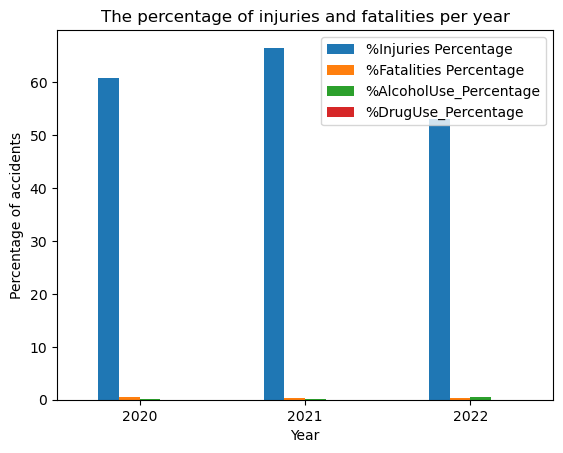

In [17]:
#Generate a bar plot showing the percentage of injuries and fatalies per year.
Figure_injuries_year = total_injuries_df[["%Injuries Percentage", "%Fatalities Percentage",
                                         "%AlcoholUse_Percentage", "%DrugUse_Percentage"]].plot(
                                        kind="bar", xlabel="Year", ylabel="Percentage of accidents", rot=0)

plt.title("The percentage of injuries and fatalities per year")
plt.show()

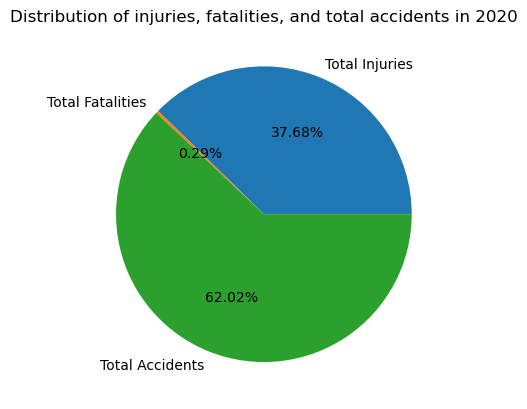

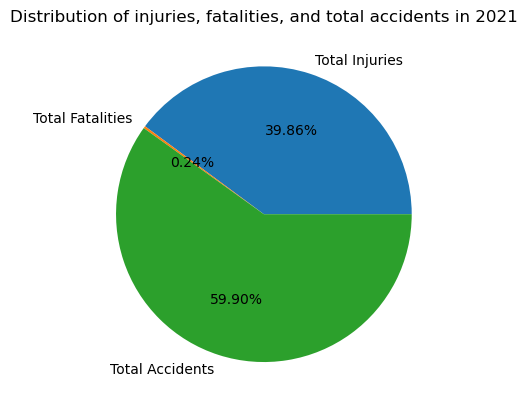

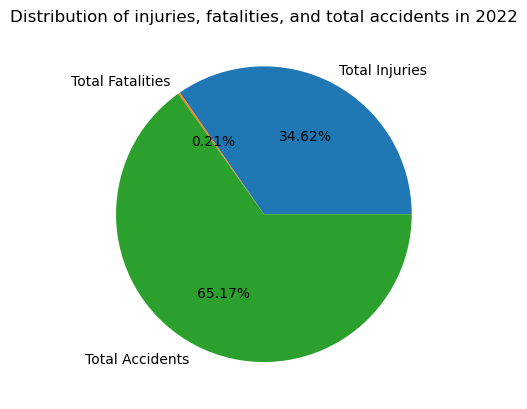

In [18]:
#create a pie chart for total_injuriesin different year

labels = ["Total Injuries", "Total Fatalities", "Total Accidents"]

for year in total_injuries_df.index:
    data_row = total_injuries_df.loc[year, ["Total injuries", "Total fatalities", "Total accidents"]]
    # Create a new figure for each pie chart
    plt.figure()  
    plt.pie(data_row, autopct='%2.2f%%', labels=labels)
    plt.title(f"Distribution of injuries, fatalities, and total accidents in {year}")

plt.show()

In [19]:
#print Question1
print("What factors affect the amount of injury and death of people in accidents?")
print("Answer:The charts show that although the number of accidents has increased over the years, more than 60% of the accidents were without injuries and the number of deaths is less than 1%.")
print("Also, the number of people who use alcohol and drugs is very small and it cannot be related to the number of accidents")

What factors affect the amount of injury and death of people in accidents?
Answer:The charts show that although the number of accidents has increased over the years, more than 60% of the accidents were without injuries and the number of deaths is less than 1%.
Also, the number of people who use alcohol and drugs is very small and it cannot be related to the number of accidents


In [20]:
#create a dataframe to found What is the correlation between age and the number of accidents?
#For the answer, we can consider the two factors of people who consume alcohol and the time of accidents
print("Q2:what is the correlation between age and the number of accidents?")

Q2:what is the correlation between age and the number of accidents?


In [21]:
#now we want to found people who use alcohol 
# Create bins for age groups
bins = [15, 25, 35, 45, 55, 65, 75, 85, 90]
labels = ['Age 15-25', 'Age 25-35', 'Age 35-45', 'Age 45-55', 'Age 55-65', 'Age 65-75', 'Age 75-85', 'Age 85-95']

# Create a new column 'AgeGroup' based on the bins
new_data_df['AgeGroup'] = pd.cut(new_data_df['Age'], bins=bins, labels=labels, right=False)

# Create a new column 'AlcoholUse' based on the combination of 'alcoholuse'
new_data_df['AlcoholUse'] = new_data_df['AlcoholUse']

# Group by 'AgeGroup' and 'AlcoholUse', then count occurrences
age_and_alcohol_counts = new_data_df.groupby(['AgeGroup', 'AlcoholUse']).size().unstack()
age_and_Drug_counts = new_data_df.groupby(['AgeGroup', 'DrugUse']).size().unstack()

# Group by 'AgeGroup' and count injuries
injuries_by_age = new_data_df.groupby('AgeGroup')['Total injuries'].sum().reset_index()

# Rename the columns for clarity
age_and_alcohol_counts.columns = [f"{col} Count" for col in age_and_alcohol_counts.columns]
age_and_Drug_counts.columns = [f"{col} Count" for col in age_and_Drug_counts.columns]
injuries_by_age.columns = ['AgeGroup', 'Total Injuries']

# Reset index for a cleaner DataFrame
age_and_alcohol_counts.reset_index(inplace=True)

# Display the result
merged_df = pd.merge(age_and_alcohol_counts, age_and_Drug_counts, on='AgeGroup', how='outer', suffixes=('_Alcohol', '_Drug'))
#merged_injuries_df= pd.merge(merged_df, age_and_injuries_counts, on='AgeGroup', how='outer')
merged_df["Total Injuries"]= injuries_by_age["Total Injuries"]
merged_df

C:\Users\tina\AppData\Local\Temp\ipykernel_4820\1615137237.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_and_alcohol_counts = new_data_df.groupby(['AgeGroup', 'AlcoholUse']).size().unstack()
C:\Users\tina\AppData\Local\Temp\ipykernel_4820\1615137237.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_and_Drug_counts = new_data_df.groupby(['AgeGroup', 'DrugUse']).size().unstack()
C:\Users\tina\AppData\Local\Temp\ipykernel_4820\1615137237.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

,AgeGroup,Alcohol Count,No Apparent Influence Count_Alcohol,Drugs Count,No Apparent Influence Count_Drug,Total Injuries
0,Age 15-25,8,1938,3,1943,1101.0
1,Age 25-35,12,1793,0,1805,1154.0
2,Age 35-45,4,1144,1,1147,648.0
3,Age 45-55,2,906,0,908,543.0
4,Age 55-65,2,723,0,725,435.0
5,Age 65-75,0,353,0,353,218.0
6,Age 75-85,0,117,0,117,82.0
7,Age 85-95,0,9,0,9,6.0


The r-value is: 0.9446325001961825
The p-value is: 2.9355498254957577e-09


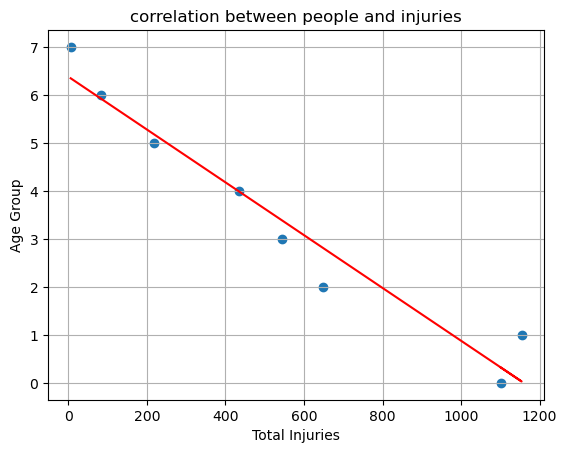

In [22]:
# Linear regression for correlation between people and injuries
x_values = merged_df['Total Injuries']
y_values = merged_df.index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-10), fontsize=15,color="red")

plt.grid()
plt.xlabel('Total Injuries')
plt.ylabel('Age Group')
plt.title('correlation between people and injuries')
print(f"The r-value is: {rvalue**2}")
print(f"The p-value is: {pvalue**2}")
plt.show()

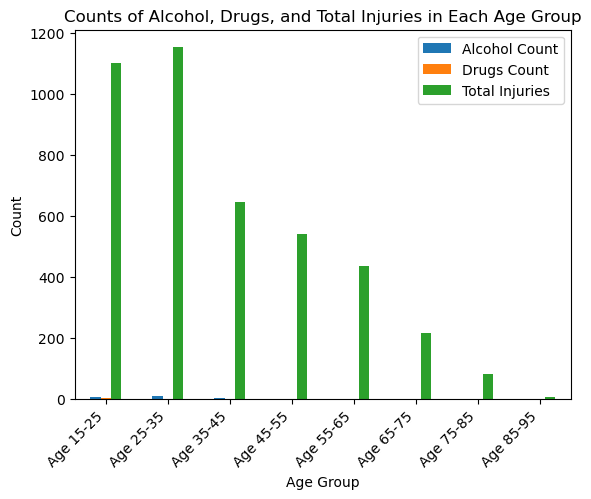

In [23]:
#Generate a bar plot showing the total number of Alcohol, Drugs, and Total Injuries in Each Age Group
Figure_age_injuries = merged_df[["Alcohol Count", "Drugs Count", "Total Injuries"]].plot(
    kind="bar", xlabel="Age Group", ylabel="Count", rot=0)

x_set = [str(age_group) for age_group in merged_df["AgeGroup"].unique()]
tick_locations = range(len(x_set))
plt.xticks(tick_locations, x_set, rotation=45, ha="right") 
plt.title("Counts of Alcohol, Drugs, and Total Injuries in Each Age Group")
plt.show()

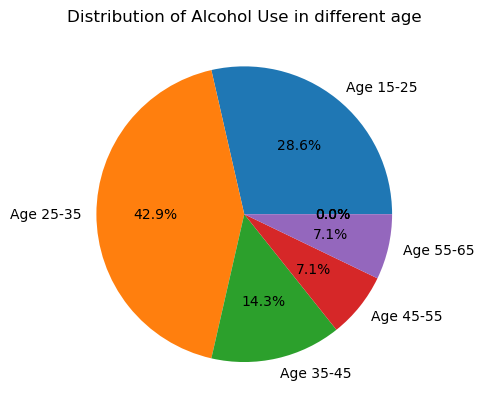

In [24]:
# Generate a pie plot showing the distribution of alcohol use in different age
labels_group = merged_df["AgeGroup"]
collect_data_pie = merged_df["Alcohol Count"]
Figure1 = collect_data_pie.plot(kind="pie", autopct='%1.1f%%', labels=labels_group, ylabel="")
plt.title('Distribution of Alcohol Use in different age')
plt.show()

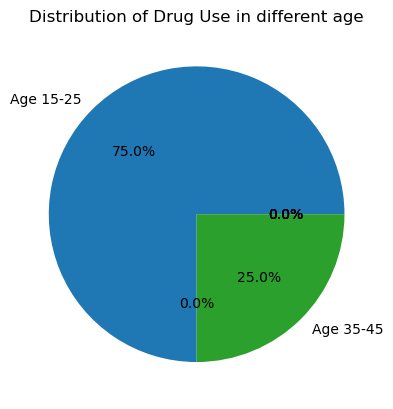

In [25]:
# Generate a pie plot showing the distribution of alcohol use in different age
labels_group = merged_df["AgeGroup"]
collect_data_pie = merged_df["Drugs Count"]
Figure1 = collect_data_pie.plot(kind="pie", autopct='%1.1f%%', labels=labels_group, ylabel="")
plt.title('Distribution of Drug Use in different age')
plt.show()

In [26]:
print("Q2:what is the correlation between age and the number of accidents?")
print("The scatterplot shows that the correlation between age and total injuries with great r-value which means that by increasing ")
print("age, the probability of accidents decreases and they drive more carefully.")
print("Also, the number of people who use alcohol and drugs is between 15 and 35")
print("on the other hand, the number of accidents are between 15-35 agegroup are more than others , so people who use alcohol and drugs are more likely to have an accident.")

Q2:what is the correlation between age and the number of accidents?
The scatterplot shows that the correlation between age and total injuries with great r-value which means that by increasing 
age, the probability of accidents decreases and they drive more carefully.
Also, the number of people who use alcohol and drugs is between 15 and 35
on the other hand, the number of accidents are between 15-35 agegroup are more than others , so people who use alcohol and drugs are more likely to have an accident.


In [27]:
#create a dataframe to found What is the correlation between roadcondition and the number of injuries?
#For the answer, we can consider Collisionmanner, Lightcondition and weather
print("Q3:what is the correlation between roadcondition and the number of injuries?")

Q3:what is the correlation between roadcondition and the number of injuries?


In [28]:
light_condition_data=new_data_df.groupby(["Lightcondition"]).sum()[["Total injuries", "Total fatalities"]]
light_condition_data

#Generate a bar plot showing The number of injuries in different light condition
Figure_age_injuries = light_condition_data.plot(
    kind="bar", xlabel="Lightcondition", ylabel="Total injuries", rot=0)

x_set = [str(age_group) for age_group in light_condition_data.index.unique()]
tick_locations = range(len(x_set))
plt.xticks(tick_locations, x_set, rotation=45, ha="right") 
plt.title("The number of injuries in different light condition")
plt.show()
light_condition_data

TypeError: category type does not support sum operations

In [ ]:
print("This bar chart shows that after normal day, most of the accidents with injuries are in the Dark lighted")

In [ ]:
Weather_data=new_data_df.groupby(["SurfaceCondition"]).sum()[["Total injuries", "Total fatalities"]]

#Generate a bar plot showing The number of injuries in different Weather condition
Figure_age_injuries = Weather_data.plot(
    kind="bar", xlabel="Weather condition", ylabel="Total injuries", rot=0)

x_set = [str(age_group) for age_group in Weather_data.index.unique()]
tick_locations = range(len(x_set))
plt.xticks(tick_locations, x_set, rotation=45, ha="right") 
plt.title("The number of injuries in different Weather condition")
plt.show()
Weather_data

In [ ]:
print("This bar chart shows that there are no correlate between the number of injuries and weather condition because most of the injuries' accident were in dry and normal weather")

In [ ]:
reason_accident_data=new_data_df.groupby(["Collisionmanner"]).sum()[["Total injuries", "Total fatalities"]]

#Generate a bar plot showing The number of injuries in different reasons
Figure_age_injuries = reason_accident_data.plot(
    kind="bar", xlabel="Reason accident", ylabel="Total injuries", rot=0)

x_set = [str(age_group) for age_group in reason_accident_data.index.unique()]
tick_locations = range(len(x_set))
plt.xticks(tick_locations, x_set, rotation=45, ha="right") 
plt.title("The number of injuries in different reasons")
plt.show()
reason_accident_data



In [29]:
print("This bar chart shows that the important reasons related to accidents were about left turn and reverse gear, so we can suggest to add more sign(stopsign or Right of way sign) to decrease the number of accidents.")

This bar chart shows that the important reasons related to accidents were about left turn and reverse gear, so we can suggest to add more sign(stopsign or Right of way sign) to decrease the number of accidents.


In [30]:
#now we can find nearest hospital to know that which hospital should have better facilities as emergency.
# Use the Pandas copy function to create DataFrame called hospital to store the streetname, collisionmanner,CrossStreet
hospital_data=new_data_df[["StreetName", "Lightcondition", "Collisionmanner", "Latitude", "Longitude"]].copy()

# Add an empty column, "hospital Name," to the DataFrame so you can store the hospital found using the Geoapify API
hospital_data["Hospital Name"]= ""

# Display sample data
hospital_data

,StreetName,Lightcondition,Collisionmanner,Latitude,Longitude,Hospital Name
37637,Ash Ave,Dark Lighted,Rear End,33.422150,-111.942400,
37639,Wilson St,Dark Not Lighted,Angle - Other Than Left Turn 2,33.424320,-111.945770,
37640,Apache Blvd,Dark Lighted,Sideswipe Same Direction,33.414770,-111.922400,
37641,Scottsdale Rd,Daylight,Angle - Other Than Left Turn 2,33.434030,-111.926260,
37642,Price Rd,Daylight,Left Turn,33.407480,-111.890330,
...,...,...,...,...,...,...
46461,Elliot Rd,Unknown 51,Left Turn,33.349081,-111.965928,
46462,University Dr,Daylight,Rear End,33.421967,-111.933653,
46463,Mill Ave,Daylight,Other,33.393137,-111.939610,
46464,Baseline Rd,Dark Lighted,Left Turn,33.378244,-111.961130,


In [31]:
# Set parameters to search for a hospital

radius = 1000
params = {
    "apiKey": geoapify_key,
    "categories": "healthcare.hospital"
}

# Print a message to follow up the hospital search
print("Starting hospital search")

# Iterate through the hotel_df DataFrame
for index, row in hospital_data.iterrows():
    
    # get latitude, longitude from the DataFrame
    latitude =hospital_data.loc[index, "Latitude"]
    longitude =hospital_data.loc[index, "Longitude"]
  
    
    # Add filter and bias parameters with the current location's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{longitude},{latitude},{radius}"
    params["bias"] = f"proximity:{longitude},{latitude}"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places?"


    # Make and API request using the params dictionaty
    name_address_1 = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    name_address = name_address_1.json()
    
    # Grab the first hospital from the results and store the name in the hospital name DataFrame
    try:
        hospital_data.loc[index, "Hospital Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        #If no hospital is found, set the hospital name as "No hopital found".
        hospital_data.loc[index, "Hospital Name"] = "No hospital found"
        
    # Log the search results
    print(f"{hospital_data.loc[index, 'StreetName']} - nearest hospital: {hospital_data.loc[index, 'Hospital Name']}")

# Display sample data
hospital_data

Starting hospital search
Ash Ave - nearest hospital: Tempe St. Luke Hospital
Wilson St - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Evergreen Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No

Priest Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
5th St - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Priest Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Broadway Rd - nearest hospital: No hospital found
Veterans Way - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: Aurora East
University Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found

Lemon St - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
Apache Blvd - nearest hospital: Tempe St. Luke Hospital
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Washington St - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. 

University Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
University Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
8th St - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Baseline Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Guadal

Kyrene Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Baseline Rd - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
11th St - nearest hospital: Tempe St. Luke Hospital
Scottsdale Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Kyrene Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Rural Rd - n

Hardy Dr - nearest hospital: No hospital found
Smith Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
College Ave - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: Aurora East
Rural Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital f

Broadway Rd - nearest hospital: Tempe St. Luke Hospital
Hardy Dr - nearest hospital: No hospital found
Drake Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
Baseline Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
McKellips Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Grove Pkwy - nearest hospital: No hospital found
Country Club Way - nearest hospital: No hospital found
Autoplex Loop - nearest hospital: No hospital found
Apache Blvd - neare

Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
University Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
University Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Country Club Way - nea

Southern Ave - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Roosevelt St - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Broadway Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Duke Dr - nearest hospital: Emergency Room at Arizona General Hospital
48th St - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: Aurora East
Universi

Scottsdale Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Broadway Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Dorsey Ln - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: Aurora East
Price Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Rural Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Baseline Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hos

Roosevelt St - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
56th St - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: Aurora East
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Apache Blvd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospit

Geneva Dr - nearest hospital: No hospital found
Minton Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Spence Ave - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
Kyrene Rd - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
48th St - nearest hospital: No hospital found
E Lakeview Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospita

McClintock Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Rural Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Broadway Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
Broadway Rd - nearest hospital: No hospital found
McClintock Dr - 

Southern Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
McClintock Dr - nearest hospital: No hospital found
Vaughn St - nearest hospital: Aurora East
Guadalupe Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Curry Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Apache Blvd - nearest hospital: No hospital found
3rd St - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Lemon St - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
48th S

McClintock Dr - nearest hospital: Laser Surgery Center
University Dr - nearest hospital: Tempe St. Luke Hospital
48th St - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Lemon St - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
College Ave - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Univer

McClintock Dr - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
McClintock Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
McClintock Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Terrace Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
2nd St - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
Rio Salado Pkwy - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital

Southern Ave - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Spence Ave - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Lakeshore Dr - nearest hospital: Emergency Room at Arizona General Hospital
Broadway Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Apache Blvd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital f

Mill Ave - nearest hospital: No hospital found
5th St - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Priest Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Aurora East
University Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
Priest Dr - nearest hospital: No hospital found
52nd St - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital 

Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Roosevelt St - nearest hospital: Tempe St. Luke Hospital
Kyrene Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Aurora East
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
Hardy Dr - nearest hospital: Tempe St. Luke Hospital
Baseline Rd - nearest hospital: No hospital found
56th St - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found

Baseline Rd - nearest hospital: No hospital found
George Dr - nearest hospital: No hospital found
Emerald Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
1st St - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
52nd St - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Scottsdale R

Mill Ave - nearest hospital: Tempe St. Luke Hospital
Rural Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
5th St - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Rural Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: Aurora East
Mill Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital f

University Dr - nearest hospital: Tempe St. Luke Hospital
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Scottsdale Rd - nearest hospital: No hospital found
Cedar St - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Vista Del Cerro Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital

University Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Playa Del Norte Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Weber Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
5th St - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hosp

Rural Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Alameda Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Warner Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
McClintock Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: Aurora East
Warner Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: 

Southern Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
12th St - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Scottsdale Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
8th St - nearest hospital: No hospital found
Lemon St - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: No hospital found
Rio Salado 

Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Minton Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Fairmont Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Alameda Dr - nearest hospital: No hospital found
La Rosa Dr - nearest hospital: Aurora East
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Aurora East
McClintock Dr - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
McClintock Dr - n

Terrace Rd - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: Aurora East
Broadway Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Vista Del Cerro Dr - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Rio Salado Pkwy - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Baseline Rd - nearest hospital: No hospital found
Rural Rd - neares

Broadway Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Elliot Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Guadalupe Rd - nearest hospital: Aurora East
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Rural Rd - nearest hospital: Aurora East
McClintock Dr - nearest hospital: No hospital found
Ash Ave - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Lakeshore Dr - nearest hospital: No hospital found
Apache Blvd - nearest 

Harl Ave - nearest hospital: No hospital found
McKellips Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
5th St - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: No hospital found
Maple Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Rural Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospi

Kyrene Rd - nearest hospital: Aurora East
Apache Blvd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Rural Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Mary St - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Priest Dr - nearest h

Southern Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
52nd St - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
McClintock Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
Baseline Rd - nearest hospital: No hospital found
5th St - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Dorsey Ln - nearest hospital: No hospital fou

Southern Ave - nearest hospital: Laser Surgery Center
Priest Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
McKemy St - nearest hospital: No hospital found
Terrace Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: Banner Desert Medical Center
McKemy St - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
SR-101 Cardinal Frontage - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: Aurora East
McClintock Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Don Carlos Ave - nearest 

McClintock Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Rio Salado Pkwy - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
Encanto Dr - nearest hospital: Tempe St. Luke Hospital
Baseline Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
SR-101 Cardinal Frontage - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Grove Pkwy - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Lakeshore Dr - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Broadwa

Rural Rd - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
Hardy Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Hermosa Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
B

Priest Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Beck Ave - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Baseline Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
McClintock Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
B

Mill Ave - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Mill Ave - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Drake Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Rural Rd - nearest hospital: No hospital found
Hazelton Ln - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Southern Ave - nearest hospital: Banner Desert Medical Center
University Dr - nearest hospital: No hospital found
Curry Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospi

Baseline Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: Banner Desert Medical Center
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
University Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Priest Dr - nearest hospital: No hospital found
Kyrene Rd - nearest hospital: Aurora East
Elliot Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital fo

Mill Ave - nearest hospital: Tempe St. Luke Hospital
McClintock Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
McClintock Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: Emergency Room at Arizona General Hospital
Broadway Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
Baseline Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
12th Pl - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Auto Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
University Dr - nearest

Baseline Rd - nearest hospital: No hospital found
Lemon St - nearest hospital: No hospital found
Rice Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
University Dr - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
SR-101 Cardinal Frontage - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: Laser Surgery Center
Broadway Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: Laser Surgery Center
McClintock Dr - nearest hospital: No hospital found
Palmcroft Dr - nearest hospital: No 

Southern Ave - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Miller Rd - nearest hospital: No hospital found
Alameda Dr - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Priest Dr - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Madison Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: Banner Desert Medical Center
Broadway Rd - nearest hospital: Tempe St. Luke Hospital
I-10 Exit 157 C-Ramp - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Dorsey Ln - nearest hospital: No hospital found
Broadway Rd - nearest hospit

Hardy Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
6th St - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Hardy Dr - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Guadalupe Rd - nearest hospital: Aurora East
Southern Ave - nearest hospital: No hospital found
McClintock Dr - nearest hospit

Rural Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Hardy Dr - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Southern Ave - nearest hospital: No hospital found
McAllister Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
B

Warner Rd - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: Tempe St. Luke Hospital
Warner Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
Rural Rd - nearest hospital: Emergency Room at Arizona General Hospital
Scottsdale Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
56th St - nearest hospital: No hospital found
University Dr - nearest hospital: Tempe St. Luke Hospital
Rural Rd - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Weber Dr - nearest hospital: No hospital found
Scottsdale Rd - nearest 

48th St - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
48th St - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
SR-101 Cardinal Frontage - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Southern Ave - nearest hospital: No hospital found
Scottsdale Rd - nearest hospital: No hospital found
Rio Salado Pkwy - nearest hospital: No hospital found
Broadway Rd - nearest hospital: No hospital found
Dorsey Ln - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
University Dr - nearest hospit

Baseline Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Curry Rd - nearest hospital: No hospital found
Rural Rd - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Dorsey Ln - nearest hospital: No hospital found
Priest Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
56th St - nearest hospital: No hospital found
University Dr - nearest hospital: No hospital found
Baseline Rd - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
Warner Rd - nearest hospital: No hospital found
Apache Blvd - nearest hospital: No hospital found
Emerald Dr - nearest hospital: No hospital found
Price Rd - nearest hospital: No hospital found
McClintock Dr - nearest hospital: No hospital found
Elliot Rd - nearest hospital: No hospital found
Mill Ave - nearest hospital: No hospital found
Warner Rd - nearest hospital: No ho

,StreetName,Lightcondition,Collisionmanner,Latitude,Longitude,Hospital Name
37637,Ash Ave,Dark Lighted,Rear End,33.422150,-111.942400,Tempe St. Luke Hospital
37639,Wilson St,Dark Not Lighted,Angle - Other Than Left Turn 2,33.424320,-111.945770,No hospital found
37640,Apache Blvd,Dark Lighted,Sideswipe Same Direction,33.414770,-111.922400,No hospital found
37641,Scottsdale Rd,Daylight,Angle - Other Than Left Turn 2,33.434030,-111.926260,No hospital found
37642,Price Rd,Daylight,Left Turn,33.407480,-111.890330,No hospital found
...,...,...,...,...,...,...
46461,Elliot Rd,Unknown 51,Left Turn,33.349081,-111.965928,No hospital found
46462,University Dr,Daylight,Rear End,33.421967,-111.933653,No hospital found
46463,Mill Ave,Daylight,Other,33.393137,-111.939610,No hospital found
46464,Baseline Rd,Dark Lighted,Left Turn,33.378244,-111.961130,No hospital found


In [ ]:
hotel = hospital_data["Hospital Name"]

# Configure the map plot

map_plot_2= hotel_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale= 0.07,
    color = hotel
    )



# Display the map
map_plot_2

In [324]:
new_data_df.describe()[["Total injuries","Total fatalities", "Age"]]

,Total injuries,Total fatalities,Age
count,7179.000000,7179.000000,7179.000000
mean,0.592980,0.003900,39.260343
std,0.914169,0.064531,21.216219
min,0.000000,0.000000,15.000000
25%,0.000000,0.000000,24.000000
50%,0.000000,0.000000,33.000000
75%,1.000000,0.000000,50.000000
max,9.000000,2.000000,255.000000


In [32]:
#filter data who use alcohol
cause_accident=new_data_df.loc[(new_data_df["AlcoholUse"]== "Alcohol")                        ]
specific_coloumn=cause_accident[[
                                "AlcoholUse", "Gender" 
                                ]]
specific_coloumn.head()

,AlcoholUse,Gender
37908,Alcohol,Male
38807,Alcohol,Male
38843,Alcohol,Male
38882,Alcohol,Male
39302,Alcohol,Male


In [358]:
alcohol_accident=specific_coloumn.groupby("Gender").count()
alcohol_accident

,AlcoholUse
Gender,
Female,11
Male,17


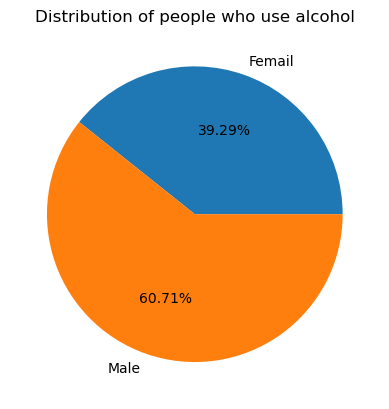

In [359]:
# Generate a pie plot showing the distribution of people who use alcohol
labels=["Femail", "Male"]
alcohol_accident = specific_coloumn.groupby("Gender")["AlcoholUse"].count()
plt.pie(alcohol_accident, autopct='%2.2f%%', labels=labels)
plt.title("Distribution of people who use alcohol")
plt.show()

In [360]:
print("Also the number of men used alcohol more than women.")

Also the number of men used alcohol more than women.
